# Naive Bays Classification

### Naive Bays Simple Example

This is a simple example of the Naive Bays algorithm from sci-kit.

In [9]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
print(clf.predict([[-0.8, -1]]))

[1]


We can see that there are 2D vectors that we are feeding in an as argument "X" which are then matched with a scalar as the expected output "Y". The GaussianNB algorithm then finds an equation that models the training data so that it can predict unknown data with the predict function or the model it just generated.

### Classifying "real" data

First import all the things we will need.

In [11]:
#Imports we will need
import matplotlib 
matplotlib.use('agg')
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from time import time

#Plotting gives unwanted warning message
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Here we have an example of generating data for Naive Bays, this is also a reuseable function that we will use when we are looking at SVM.

In [12]:
def makeTerrainData(n_points=1000):
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0, n_points)]
    bumpy = [random.random() for ii in range(0, n_points)]
    error = [random.random() for ii in range(0, n_points)]
    y = [round(grade[ii] * bumpy[ii] + 0.3 + 0.1 * error[ii]) for ii in range(0, n_points)]
    
    for ii in range(0, len(y)):
        if grade[ii] > 0.8 or bumpy[ii] > 0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75 * n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {
        "fast": {
            "grade": grade_sig, 
            "bumpiness": bumpy_sig
        }, 
        "slow": {
            "grade": grade_bkg, 
            "bumpiness": bumpy_bkg
        }
    }

    #    return training_data, test_data
    return X_train, y_train, X_test, y_test



A Simple classify function where we classifiy with NB.

In [13]:
def classify(features_train, labels_train):   
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    clf = GaussianNB()
    return clf.fit(features_train, labels_train)

Metrics function to calculate the performace of our classifiers.

In [14]:
def displayAccuracy(pred, label_test):
    #Display our accuracy metric
    acc = accuracy_score(pred, labels_test)
    print('Accuracy: {:.2%}'.format(acc))


A function to plot and or save a graph for visuals.

In [15]:
def prettyPicture(clf, X_test, y_test, name):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    #, cmap=pl.cm.seismic
    plt.pcolormesh(xx, yy, Z)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.show()
    
#     Optoin to save the graph as a picture I chose to just inline it for this document
#     plt.savefig(name)

Here We test our NB classifier and output dome info.

Train time: 0.003
Accuracy: 88.40%


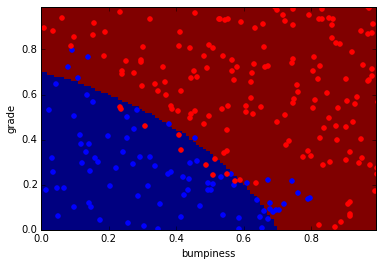

In [16]:
#Here is where we generate our data we will use throughout.
features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

t0 = time()
clf = classify(features_train, labels_train)
print('Train time: {}'.format(round(time() - t0, 3), 's'))

pred = clf.predict(features_test)
displayAccuracy(pred, labels_test)

### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test, "NB.png")


We can see that the Naive Bays classification fits reasonably well (88.4%), with the curved line separating the blue/red data points or in this case the areas one should travel fast or slow.

# SVM Classification

### SVM Simple Example


Here we have an example straight from the docs of sklearn, this will act as my reference while I'm experimenting with the parameters.

In [53]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf.fit(X, y)


print(clf.predict([[2., 2.]]))

[1]


### SVM Technical

SVM is a powerful classification technique that can outperform Naive Bays (NB) in many instance. The trick behind SVM is to map our $n$ dimensional training data to a higher dimension $m$, so that we can find a linear relation that was not possible in the original dimensions, then we can map back to our original $n$ dimensions in the form of a non-linear relation. The mapping is the job of the kernel function typically denoted $k(x,y)$, which can come in many different forms. The definition and kernels used are denoted below.

$$ k: \mathcal X \times \mathcal X \rightarrow \mathbb R $$

$$ \sum_{i,j=0}^n c_i c_j k(x_i,x_j) \ge 0 \quad n \in \mathbb N \quad x_1,x_2, \ldots ,x_n \in \mathcal X \quad c_1,c_2, \ldots ,c_n \in \mathbb R$$

$$ linear: \quad k(x,y) = x^Ty$$

$$ rbf: \quad k(x,y) = e^{\frac{||x-y||^2}{-2\sigma^2}} $$

SVM does come at a cost, it's efficency is $O(n^3)$ on the training step, which can take much longer than NB in certain cases, also we must note that SVM depends on $k(x,y)$, like the $linear, rbf, polynomial, sigmoid$ kernels, these kernels have different efficencies and performance, depending on the data. For example $linear$ will be much faster than $rbf$, since $rbf$ can be non-linear and thus more complex to calculate, however if the data has a more $linear$ classification a $linear$ kernel can out perform an $rbf$ kernel, because of over fitting. The same idea applies to the other kernels as well, so one must understand the data to choose the best option in terms of efficiency and performance. 

### SVM using our data from earlier

An example of linear SVM using the generated data, with the gamma parameter set to 1.0.

Accuracy: 92.00%


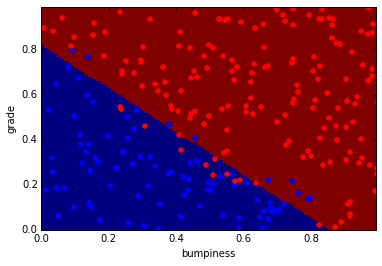

In [17]:
features_train, labels_train, features_test, labels_test = makeTerrainData()


########################## SVM #################################
from sklearn.svm import SVC
clf = SVC(kernel='linear', gamma=1.0)


clf.fit(features_train, labels_train)

pred = clf.predict(features_test)

displayAccuracy(pred, labels_test)

#Generate a picture of the data
prettyPicture(clf, features_test, labels_test, "SVM.png")

Now Lets try the RBF (a non linear svm kernel) and lets play with the parameters.

### SVM kernel = rbf, C = 1

Accuracy: 92.00%


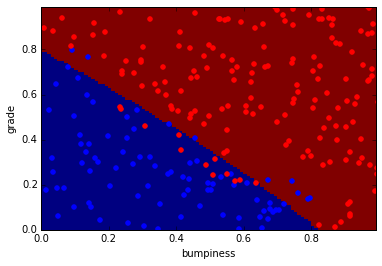

In [18]:
clf = SVC(kernel='rbf', C=1.0)
clf.fit(features_train, labels_train)

pred = clf.predict(features_test)

displayAccuracy(pred, labels_test)

prettyPicture(clf, features_test, labels_test, "rbf_SM_C.png")

### SVM kernel = rbf, C = 1000, gamma = 10

0.02 s
Accuracy: 94.80%


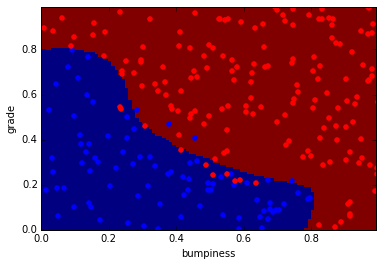

In [72]:
clf = SVC(kernel='rbf', C=1000.0, gamma=10)

t0 = time()
clf.fit(features_train, labels_train)
print(round(time() - t0, 3), 's')

pred = clf.predict(features_test)

displayAccuracy(pred, labels_test)

prettyPicture(clf, features_test, labels_test, "rbf_L_C.png")

Changing the gamma can increase our performance even more than the larger C value! Note that this was a tuning process, if you play with the gamma (make it too large or too small) you get a strange graph that actually does worse. I found $10$ to be the best value after a bit of tuning.

### SVM kernel = rb, C = 100000

0.105 s
Accuracy: 94.40%


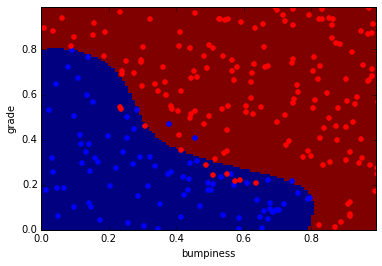

In [69]:
clf = SVC(kernel='rbf', C=100000.0)

t0 = time()
clf.fit(features_train, labels_train)
print(round(time() - t0, 3), 's')

pred = clf.predict(features_test)

displayAccuracy(pred, labels_test)

prettyPicture(clf, features_test, labels_test, "rbf_XL_C.png")

Here we took out the gamma and made a very large $C$ value, notice how it does good, but not quite as well as the one with the tuned gamma and the time to train is roughly $5$ time greater than the tuned gamma!

### Conculsion

It is obvious that tuning can make a difference in performance, we noticed as the $C$ became larger the classification performance improved and became more complex, but tuning the values will give the best performance and speed overall. It is shown that SVM can outperform NB, but also runs the risk of over fitting and poor efficiency, however in this example SVM was better than NB. SVM allowed for better performance, at a relatively low cost in time.

### References

http://scikit-learn.org/stable/modules/svm.html  
http://scikit-learn.org/stable/modules/naive_bayes.html  
https://www.udacity.com/wiki/ud120  